Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Import cleaned data

In [2]:
df = pd.read_csv('BACKUP cleaned_zillow_data.csv')
df.head()

,Unnamed: 0,zillowId,homeStatus,streetAdress,city,state,zipcode,price,bedrooms,bathrooms,...,ngram_indooroutdoor,ngram_court,ngram_architectural,ngram_subzero,ngram_rarefied,ngram_antiquities,ngram_sauna,ngram_terrace,ngram_saota,ngram_italian
0,2,23352313.0,FOR_SALE,7001 Palm Lane,Anacortes,WA,98221.0,2498000.0,4.0,3.0,...,0,1,0,0,0,0,0,0,0,0
1,3,23380009.0,FOR_SALE,14820 Gibralter Road,Anacortes,WA,98221.0,5300000.0,5.0,6.0,...,0,0,0,0,0,0,0,0,0,0
2,4,23352179.0,FOR_SALE,7270 Old Brook Lane,Anacortes,WA,98221.0,1499000.0,5.0,4.0,...,0,0,0,0,0,0,0,0,0,0
3,6,23377187.0,FOR_SALE,13574 S Green Street,Anacortes,WA,98221.0,399000.0,2.0,1.0,...,0,0,0,0,0,0,0,0,0,0
4,9,23377249.0,FOR_SALE,13590 Slice Street,Anacortes,WA,98221.0,1250000.0,1.0,2.0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128960 entries, 0 to 128959
Columns: 117 entries, Unnamed: 0 to ngram_italian
dtypes: bool(11), float64(32), int64(59), object(15)
memory usage: 105.6+ MB


Check for Missing Data

In [60]:
df.isnull().sum()

,0
Unnamed: 0,0
zillowId,0
homeStatus,0
streetAdress,1
city,0
...,...
ngram_antiquities,0
ngram_sauna,0
ngram_terrace,0
ngram_saota,0


In [62]:
missing_counts = df.isnull().sum()
columns_with_missing = missing_counts[missing_counts > 0]
columns_with_missing

,0
streetAdress,1
zestimate,43306
livingArea,3962
levels,41895
buyersFeePerc,23787
listingUserId,18784
agentName,49838
agentRating,8528
photosList,232
rentZestimate,31418


Analyze Numerical Features

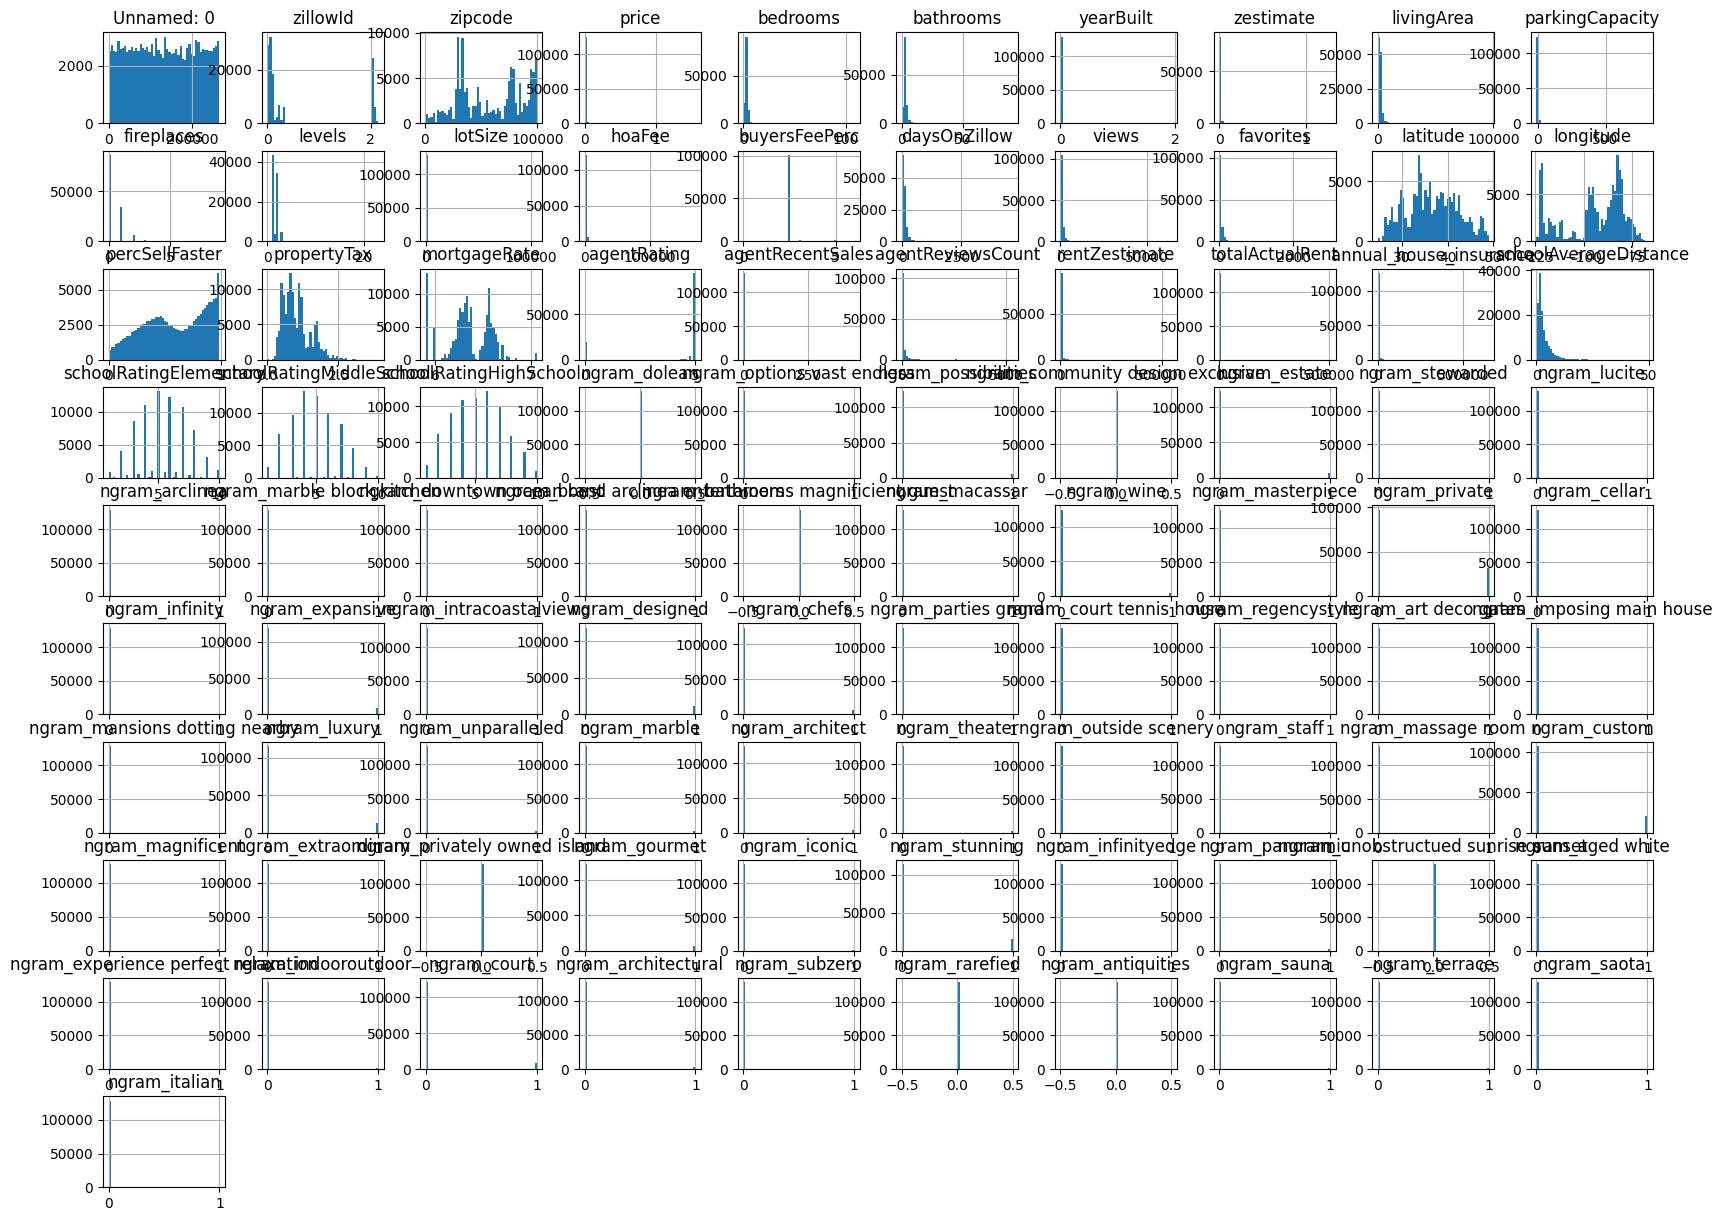

In [6]:
df.hist(figsize=(20,15), bins=50)
plt.show()

In [7]:
for col in df.select_dtypes(include=['object', 'bool']).columns:
    print(f'{col}: {df[col].nunique()} unique values')
    print(df[col].value_counts())
    print("\n")

homeStatus: 1 unique values
homeStatus
FOR_SALE    128960
Name: count, dtype: int64


streetAdress: 128760 unique values
streetAdress
107 W Main St             4
402 S Main St             3
1805 Bridgepointe Cir     3
4903 State Highway 361    3
509 Pine St               3
                         ..
9223 Rialto Ln            1
4215 Sonoma Oaks Cir      1
1480 39th St SW           1
4480 1st Ave NW           1
100 N Riverdale Rd        1
Name: count, Length: 128760, dtype: int64


city: 7205 unique values
city
Atlanta        1390
Detroit        1216
Los Angeles    1048
Las Vegas      1010
San Antonio     842
               ... 
Astoria           1
Brush Creek       1
Mckee             1
Baileyville       1
Flagstaff         1
Name: count, Length: 7205, dtype: int64


state: 48 unique values
state
TX    15676
CA    14820
FL    13594
GA     6641
WA     5436
NC     4888
MI     3913
SC     3571
TN     3525
AZ     3225
OR     3189
OH     3015
NY     2901
PA     2813
IN     2796
MN     2459


In [8]:
numerical_df = df.select_dtypes(include=['int64', 'float64'])

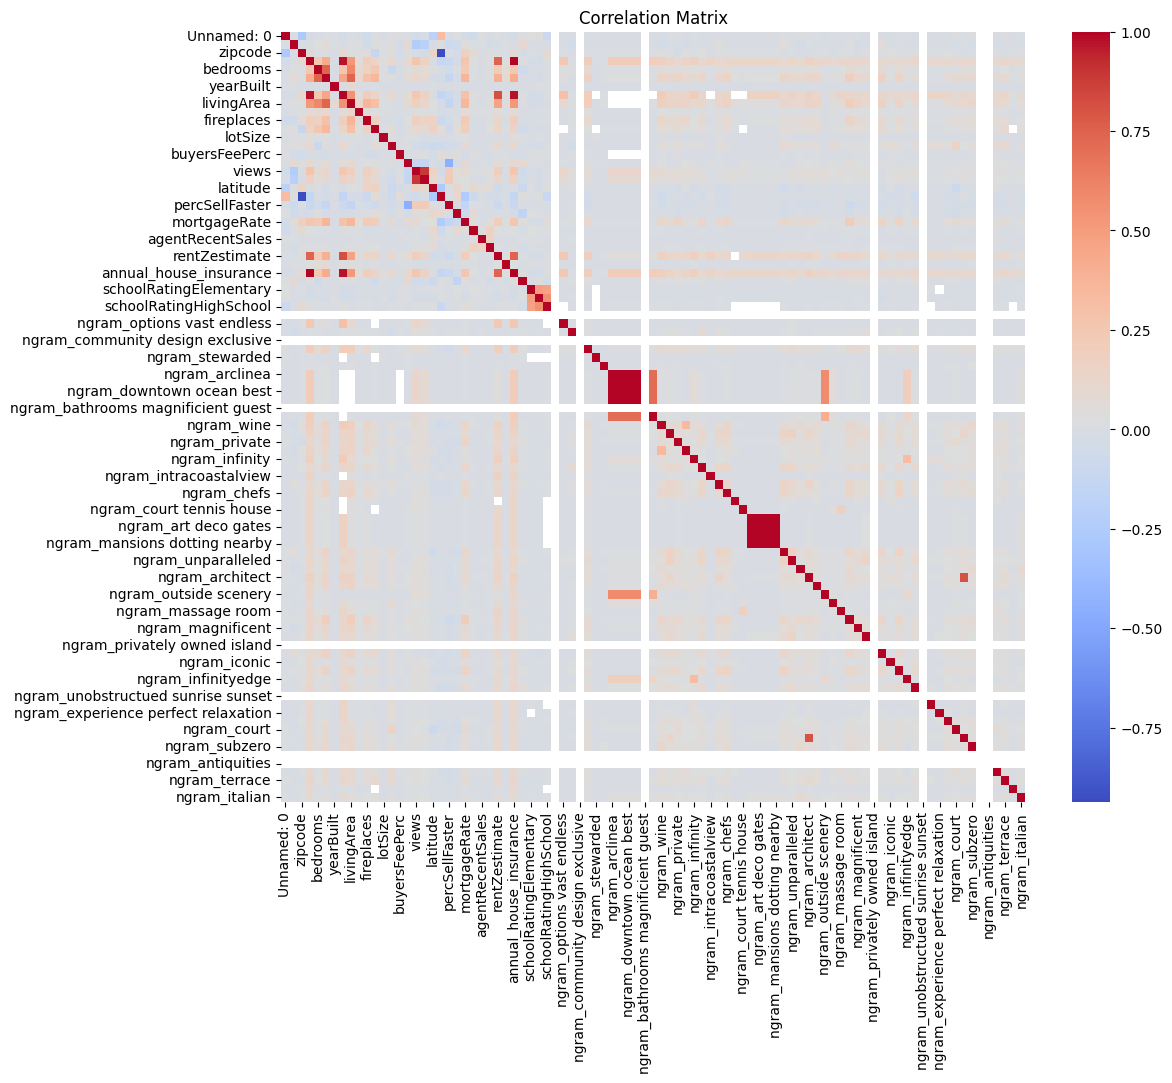

In [9]:
corr_matrix = numerical_df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [29]:
from sklearn.feature_selection import VarianceThreshold

# Set a threshold, e.g., remove features with less than 5% variance
selector = VarianceThreshold(threshold=0.05)
reduced_df = selector.fit_transform(df.select_dtypes(include=['int64', 'float64']))

# Get the remaining features
selected_columns = df.select_dtypes(include=['int64', 'float64']).columns[selector.get_support()]
print(selected_columns)

Index(['Unnamed: 0', 'zillowId', 'zipcode', 'price', 'bedrooms', 'bathrooms',
       'yearBuilt', 'zestimate', 'livingArea', 'parkingCapacity', 'fireplaces',
       'levels', 'lotSize', 'hoaFee', 'buyersFeePerc', 'daysOnZillow', 'views',
       'favorites', 'latitude', 'longitude', 'percSellFaster', 'propertyTax',
       'mortgageRate', 'agentRating', 'agentRecentSales', 'agentReviewsCount',
       'rentZestimate', 'totalActualRent', 'annual_house_insurance',
       'schoolAverageDistance', 'schoolRatingElementary',
       'schoolRatingMiddleSchool', 'schoolRatingHighSchool', 'ngram_estate',
       'ngram_private', 'ngram_expansive', 'ngram_designed', 'ngram_luxury',
       'ngram_custom', 'ngram_stunning', 'ngram_court'],
      dtype='object')


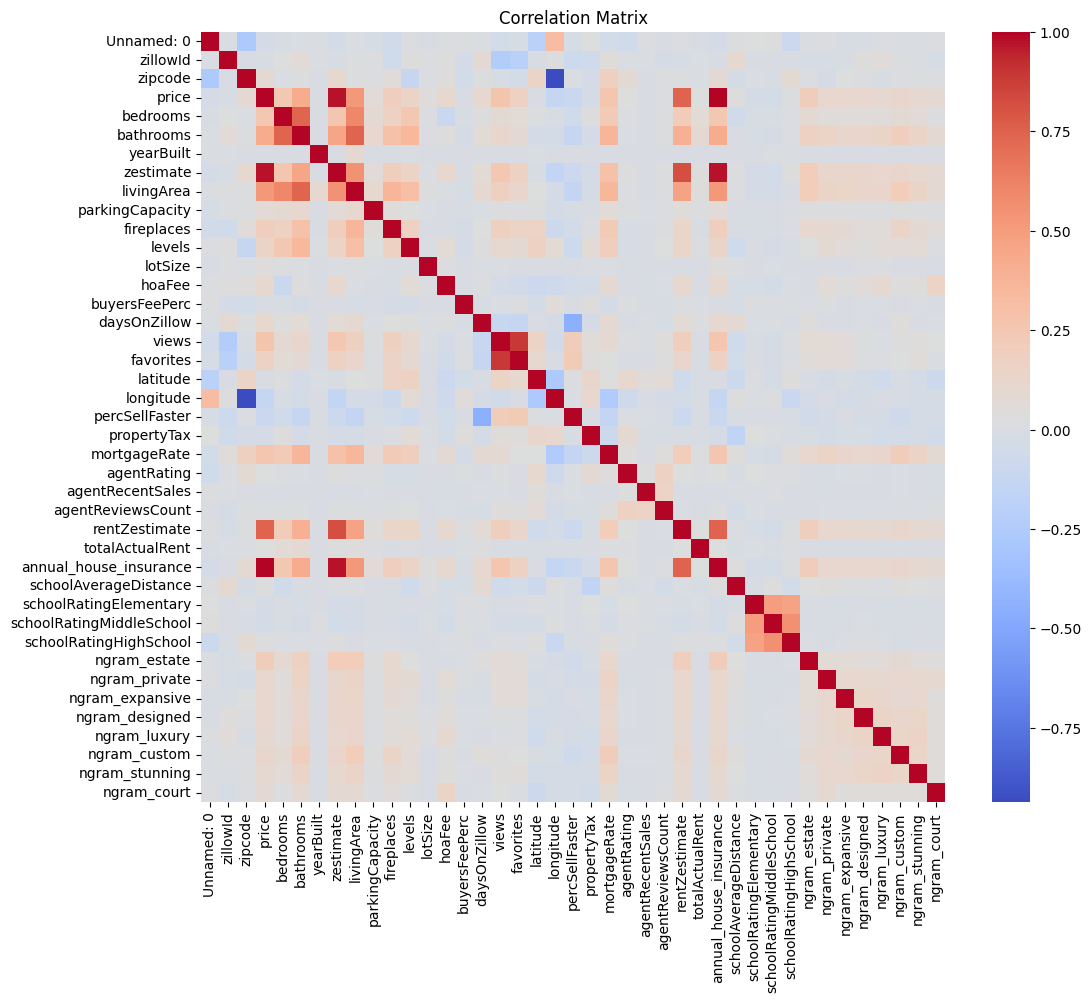

In [30]:
selected_df = df[selected_columns]
corr_matrix = selected_df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [66]:
# Identify outliers using the IQR method
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create datasets for outliers and non-outliers
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
non_outliers = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

# Calculate descriptive statistics for the specified columns
columns_to_compare = ['bedrooms', 'bathrooms', 'yearBuilt', 'livingArea',
                      'parkingCapacity', 'annual_house_insurance']

outlier_stats = outliers[columns_to_compare].describe()
non_outlier_stats = non_outliers[columns_to_compare].describe()

print("Outlier Statistics:\n", outlier_stats)
print("\nNon-Outlier Statistics:\n", non_outlier_stats)

Outlier Statistics:
            bedrooms     bathrooms     yearBuilt    livingArea  \
count  12390.000000  12390.000000  12390.000000  11949.000000   
mean       4.572962      4.616069   1954.929540   4311.720416   
std        3.294729      3.133911    262.863025   3138.434392   
min        0.000000      0.000000      0.000000      0.000000   
25%        3.000000      3.000000   1970.000000   2589.000000   
50%        4.000000      4.000000   2000.000000   3683.000000   
75%        5.000000      6.000000   2018.000000   5142.000000   
max      108.000000     91.000000   2025.000000  96000.000000   

       parkingCapacity  annual_house_insurance  
count     12390.000000            12390.000000  
mean          3.186723            14275.361764  
std           5.263612            20281.928184  
min         -11.000000             5543.580000  
25%           2.000000             6720.000000  
50%           2.000000             9177.546000  
75%           4.000000            14279.995800  
m

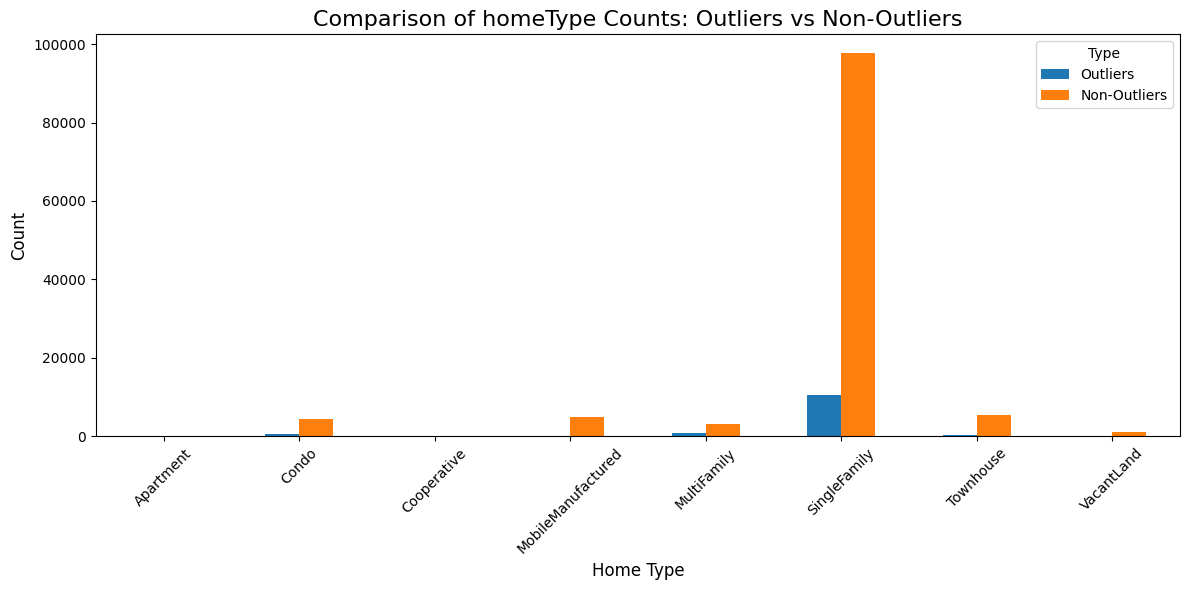

In [67]:
# Count homeType occurrences in outliers and non-outliers
outlier_counts = outliers['homeType'].value_counts().reset_index()
outlier_counts.columns = ['homeType', 'count_outliers']

non_outlier_counts = non_outliers['homeType'].value_counts().reset_index()
non_outlier_counts.columns = ['homeType', 'count_non_outliers']

# Merge the counts into a single DataFrame
comparison_df = pd.merge(outlier_counts, non_outlier_counts, on='homeType', how='outer').fillna(0)

# Plot the counts
comparison_df.set_index('homeType').plot(kind='bar', figsize=(12, 6))
plt.title('Comparison of homeType Counts: Outliers vs Non-Outliers', fontsize=16)
plt.xlabel('Home Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Type', labels=['Outliers', 'Non-Outliers'])
plt.tight_layout()
plt.show()

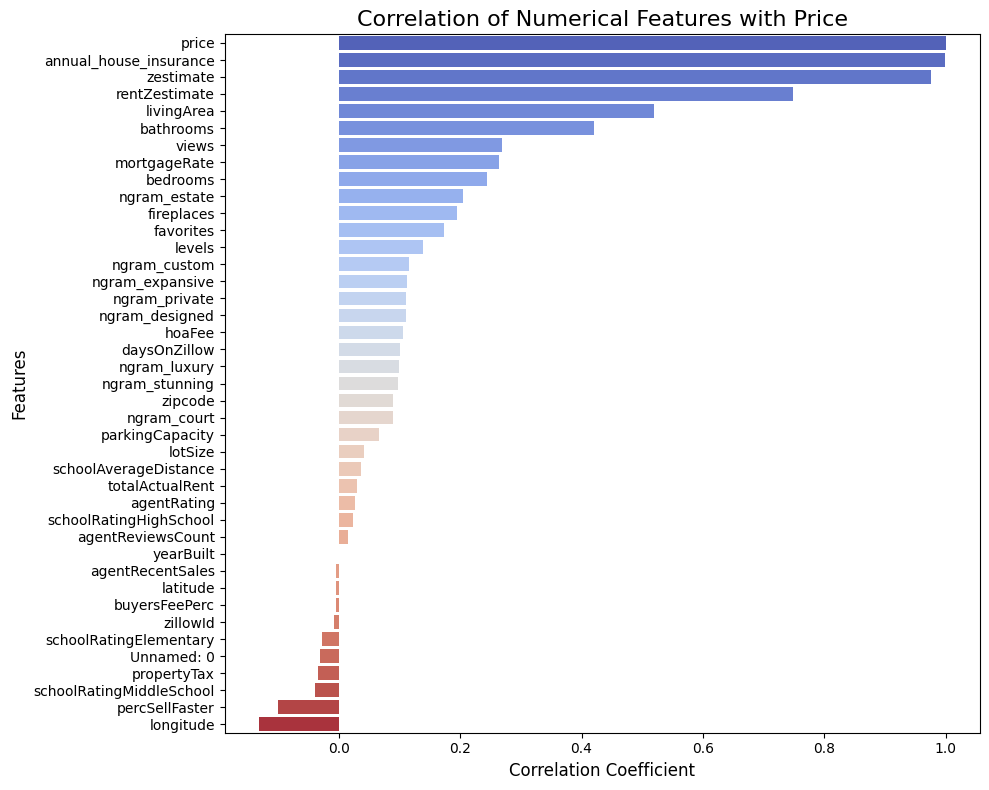

In [32]:
# Calculate correlation between all numerical columns and 'price'
correlation_with_price = selected_df.corr()['price'].sort_values(ascending=False)

# Set up the figure size
plt.figure(figsize=(10, 8))

# Create a horizontal bar plot
sns.barplot(x=correlation_with_price.values, y=correlation_with_price.index, palette='coolwarm')

# Add title and labels
plt.title('Correlation of Numerical Features with Price', fontsize=16)
plt.xlabel('Correlation Coefficient', fontsize=12)
plt.ylabel('Features', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()

In [12]:
state_agg = df.groupby('state').size().reset_index(name='count')

In [13]:
import geopandas as gpd
us_states = gpd.read_file('./ne_110m_admin_1_states_provinces.shp')
us_states = us_states[us_states['iso_a2'] == 'US']

In [43]:
us_states['state_abbrev'] = us_states['name_alt'].str[:2]
us_states.loc[us_states['name'] == 'Kentucky', 'state_abbrev'] = 'KY'
us_states.loc[us_states['name'] == 'Pennsylvania', 'state_abbrev'] = 'PA'
us_states.loc[us_states['name'] == 'Massachusetts', 'state_abbrev'] = 'MA'
us_states.loc[us_states['name'] == 'Rhode Island', 'state_abbrev'] = 'RI'

In [51]:
merged_df = us_states.merge(state_agg, left_on='state_abbrev', right_on='state', how='left')
merged_df = merged_df[~merged_df['count'].isnull()]

We are missing records from HI, AK, and DC

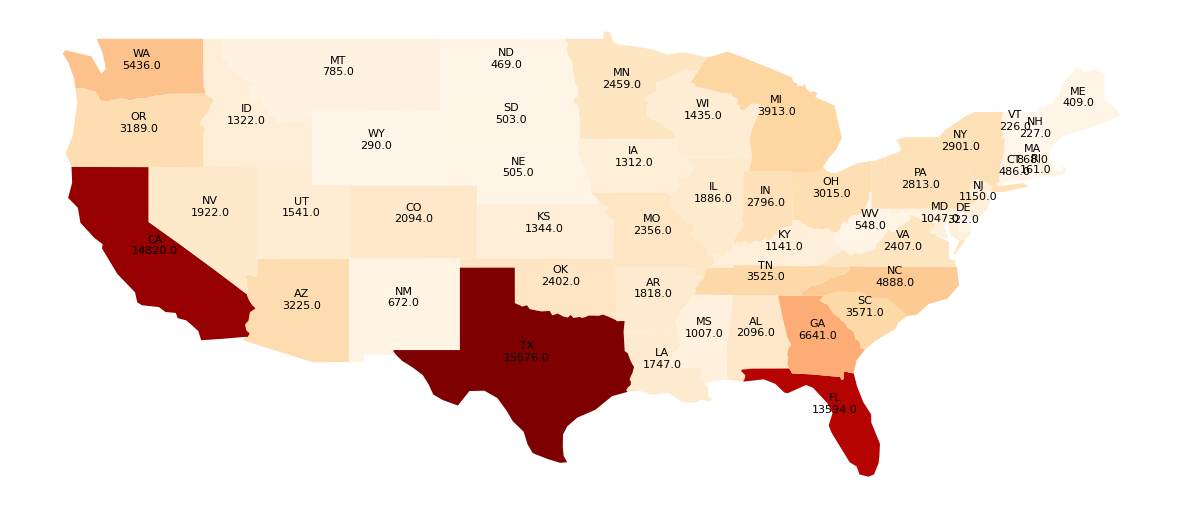

In [54]:
# Create the plot for 'count' with GeoPandas
fig, ax = plt.subplots(1, 1, figsize=(15, 12))
merged_df.plot(column='count', ax=ax, cmap='OrRd')

# Add state_abbrev and count labels
for idx, row in merged_df.iterrows():
    # Positioning the text near the center of the state geometry
    plt.text(row.geometry.centroid.x, row.geometry.centroid.y,
             f"{row['state_abbrev']}\n{row['count']}",
             ha='center', fontsize=8, color='black')

# Customize the plot
# plt.title('States with Abbreviation and Count', fontsize=16)
plt.axis('off')  # Hide the axes

# Show the plot
plt.show()

In [55]:
# merged_df.plot(column = 'count', figsize = (10, 8))

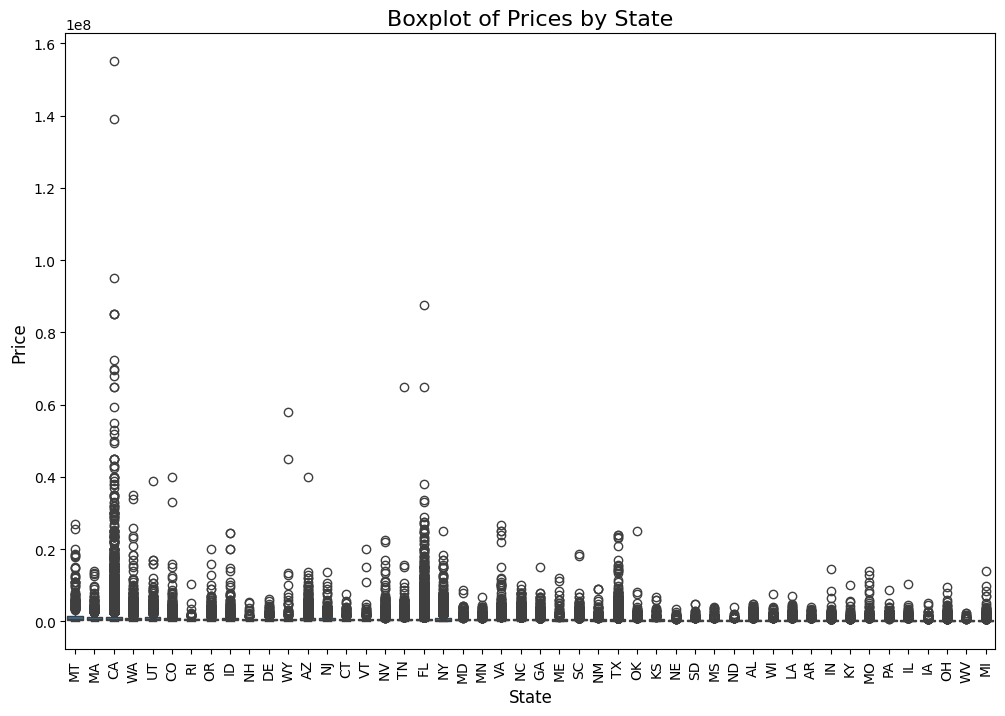

In [37]:
plt.figure(figsize=(12, 8))

sns.boxplot(x='state', y='price', data=df, order=df.groupby('state')['price'].median().sort_values(ascending=False).index)

plt.xticks(rotation=90)

plt.title('Boxplot of Prices by State', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Price', fontsize=12)

plt.show()

In [18]:
pivot_table = df.groupby('state')['price'].agg(
    Q1=lambda x: x.quantile(0.25),
    Median='median',
    Q3=lambda x: x.quantile(0.75)
).reset_index()

pivot_table

,state,Q1,Median,Q3
0,AL,200000.00,319900.0,479023.75
1,AR,179000.00,289950.0,439000.00
2,AZ,345000.00,489990.0,850000.00
3,CA,485000.00,729000.0,1325000.00
4,CO,449125.00,595000.0,847980.00
5,CT,320000.00,475000.0,793725.00
6,DE,350000.00,496500.0,775000.00
7,FL,329000.00,449000.0,700000.00
8,GA,299000.00,399000.0,565000.00
9,IA,170000.00,259000.0,379922.50


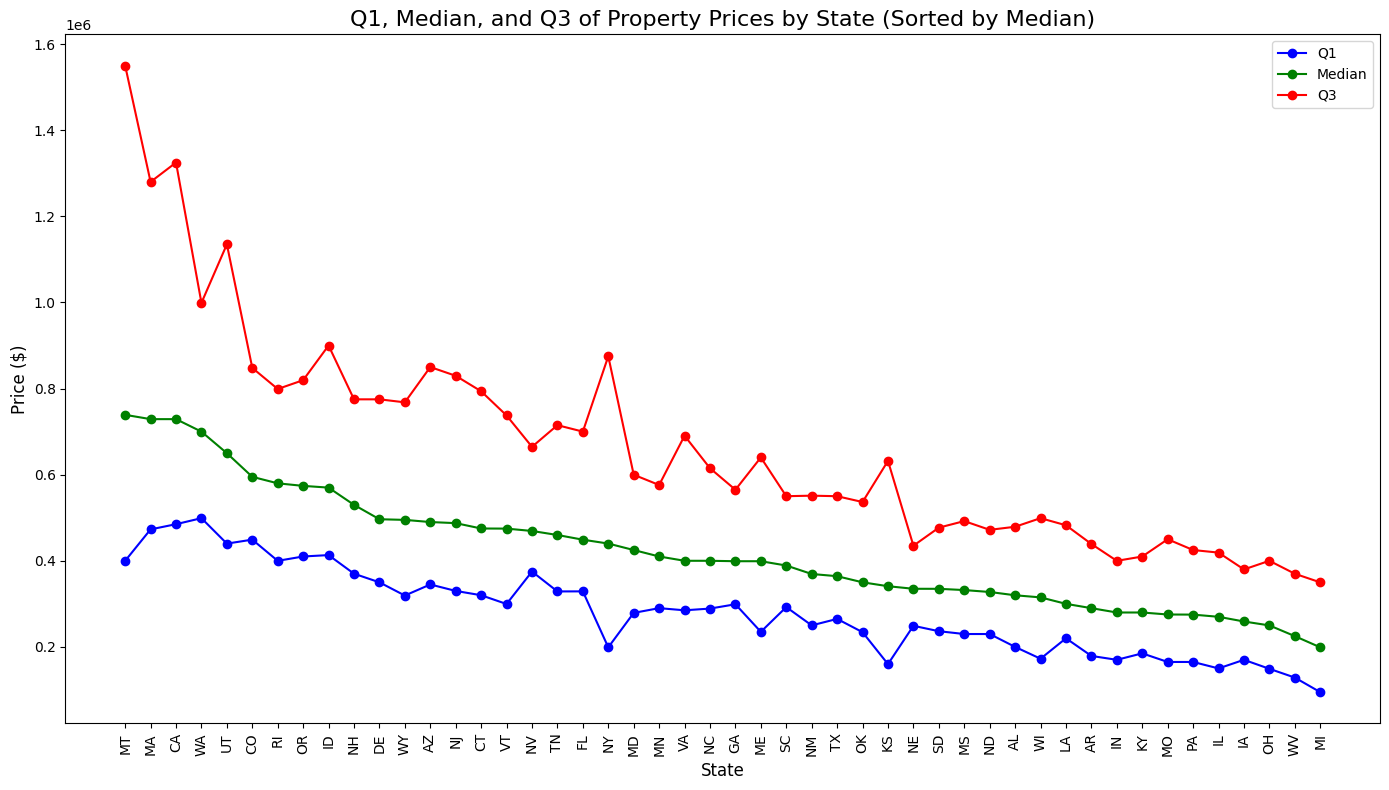

In [38]:
pivot_table_sorted = pivot_table.sort_values(by='Median', ascending=False)

plt.figure(figsize=(14, 8))

# Plot lines for Q1, Median, and Q3, sorted by median
plt.plot(pivot_table_sorted['state'], pivot_table_sorted['Q1'], label='Q1', marker='o', linestyle='-', color='blue')
plt.plot(pivot_table_sorted['state'], pivot_table_sorted['Median'], label='Median', marker='o', linestyle='-', color='green')
plt.plot(pivot_table_sorted['state'], pivot_table_sorted['Q3'], label='Q3', marker='o', linestyle='-', color='red')

# Customize the plot
plt.title('Q1, Median, and Q3 of Property Prices by State (Sorted by Median)', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.xticks(rotation=90)  # Rotate state names for better visibility
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

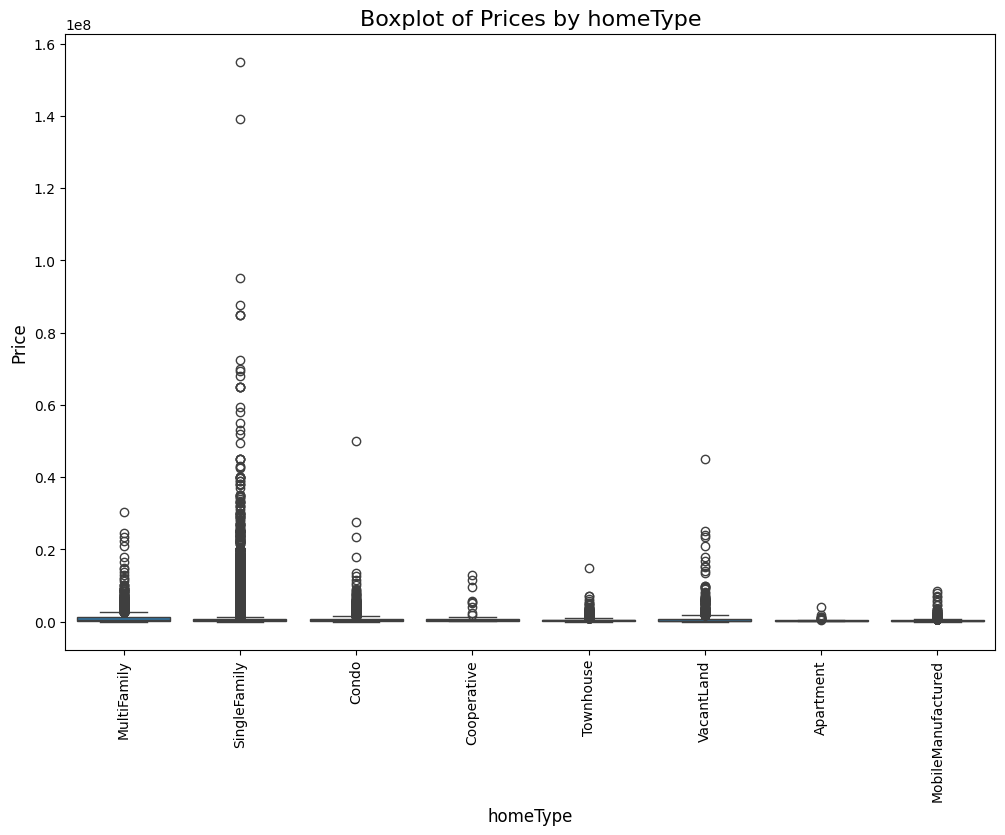

In [19]:
plt.figure(figsize=(12, 8))

sns.boxplot(x='homeType', y='price', data=df, order=df.groupby('homeType')['price'].median().sort_values(ascending=False).index)

plt.xticks(rotation=90)

plt.title('Boxplot of Prices by homeType', fontsize=16)
plt.xlabel('homeType', fontsize=12)
plt.ylabel('Price', fontsize=12)

plt.show()

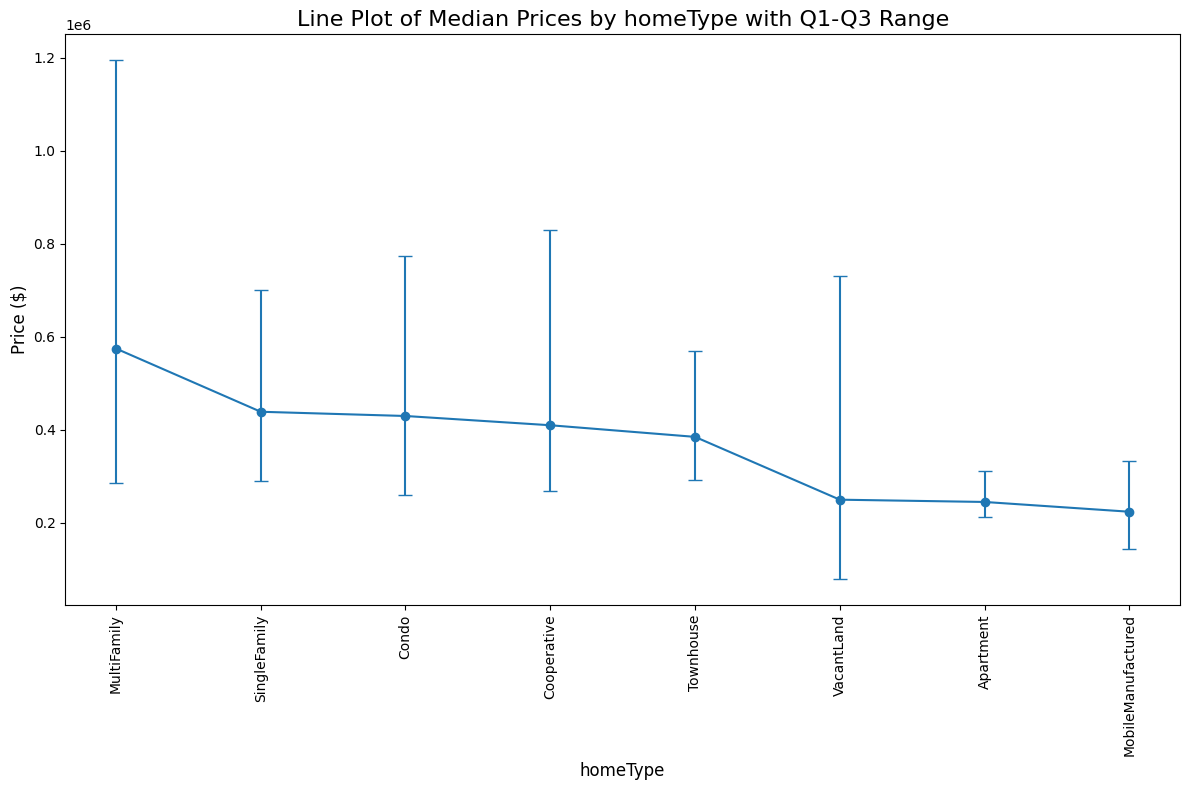

In [40]:
# Calculate Q1, median, and Q3 for each homeType
home_type_stats = df.groupby('homeType')['price'].agg(Q1=lambda x: x.quantile(0.25),
                                                      Median='median',
                                                      Q3=lambda x: x.quantile(0.75)).sort_values(by='Median', ascending=False)

# Create a line plot with error bars for Q1 and Q3
plt.figure(figsize=(12, 8))

# Plot the median prices with error bars showing the range between Q1 and Q3
plt.errorbar(x=home_type_stats.index, y=home_type_stats['Median'],
             yerr=[home_type_stats['Median'] - home_type_stats['Q1'], home_type_stats['Q3'] - home_type_stats['Median']],
             fmt='o-', capsize=5, label='Median with Q1-Q3 Range')

# Customize the plot
plt.xticks(rotation=90)
plt.title('Line Plot of Median Prices by homeType with Q1-Q3 Range', fontsize=16)
plt.xlabel('homeType', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()